In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Base Function class
class Function:
    def __init__(self):
        pass
    
    # Returns f(x)
    def __call__(self, *args, **kwargs):
        pass
    
    # Returns f'(x)
    def prime(self, x):
        pass
    
    # (Not used here but included for completeness)
    def parameters(self):
        return dict()


In [8]:
# Gradient Descent implementation
def gradient_descent(
    f: Function,
    x_init: float,        # initial starting point
    learning_rate: float = 0.1,
    n_iter: int = 1000,
    return_all: bool = False
):
    xs = [x_init]   # store intermediate values for visualization
    
    for n in range(n_iter):
        x = xs[-1]
        grad = f.prime(x)                     # compute derivative
        x_next = x - learning_rate * grad     # gradient descent update
        xs.append(x_next)
    
    if return_all:
        return xs
    else:
        return x



In [9]:
# Example function: f(x) = x^2
class Square(Function):
    def __call__(self, x):
        return x**2
    
    def prime(self, x):
        return 2*x


In [10]:
# Run gradient descent on f(x) = x^2
f = Square()
result = gradient_descent(f, x_init=5.0)

print("Minimum found at x =", result)

Minimum found at x = 7.688949513507002e-97


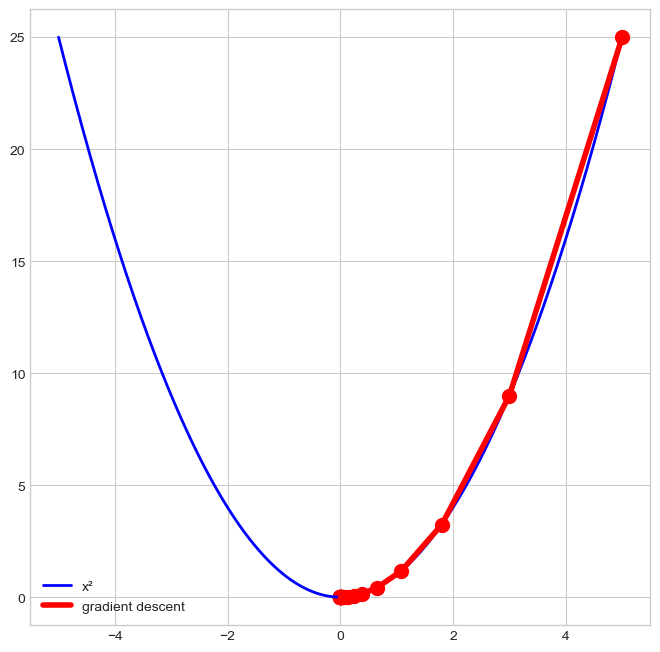

In [12]:
def plot_gradient_descent(f, xs: list, x_min: float, x_max: float, label: str = "f(x)"):

    # Compute y-values for the gradient descent points
    ys = [f(x) for x in xs]

    # Create a smooth grid of x values
    grid = np.linspace(x_min, x_max, 1000)

    # Compute f(x) for each x in the grid
    fs = [f(x) for x in grid]

    # Plotting
    with plt.style.context("seaborn-v0_8-whitegrid"):
        plt.figure(figsize=(8, 8))

        # Plot the original function curve
        plt.plot(grid, fs, label=label, c="b", lw=2.0)

        # Plot the gradient descent path line
        plt.plot(xs, ys, label="gradient descent", c="r", lw=4.0)

        # Plot the individual gradient descent points
        plt.scatter(xs, ys, c="r", s=100.0)

        plt.legend()
        plt.show()

# Example usage:
xs = gradient_descent(f, x_init=5.0, n_iter=25, learning_rate=0.2, return_all=True)
plot_gradient_descent(f, xs, x_min=-5, x_max=5, label="x²")


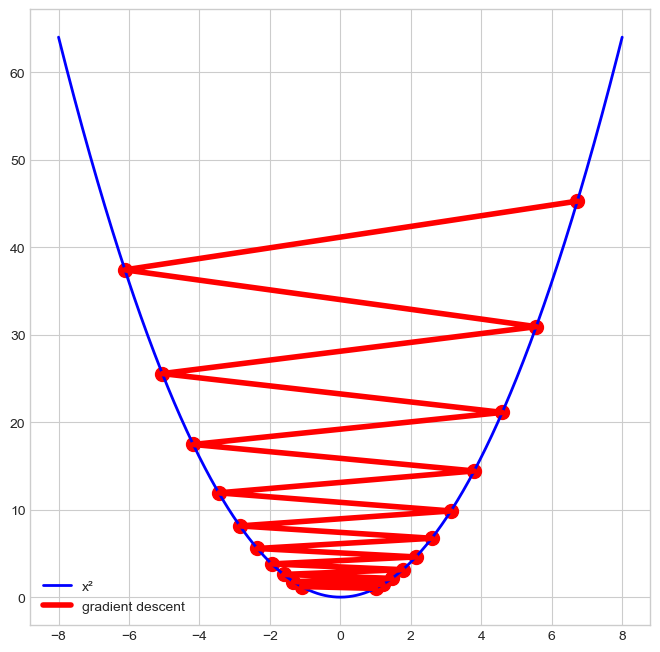

In [15]:
xs = gradient_descent(f, x_init=1.0, n_iter=20, learning_rate=1.05, return_all=True)
plot_gradient_descent(f, xs,-8, 8, label="x²")